In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# uniques values in all non-numerical columns of data frame to find out Nan values
def colUnique(df):
    for x in df.columns:
            if df[x].dtype=='object':
                print(df[x].unique(),'\n')
                
# Converting non-numerical values to numerical values
def dummy(df):
    df=pd.get_dummies(df)
    return df               

# normalizing the whole numerical data
def normalize(df,col):
    for x in col:
        mean=df[x].mean()
        std=df[x].std()
        df[x]=(df[x]-mean)/std
    return df
    
# separating target and input variables.
def sepxy(df,col):
    x=df.drop(col,axis=1)
    y=df[col]
    return x,y

# Randomly shuffling the whole dataframe with respect to rows.
def shuffleit(df):
    return df.sample(frac=1)

# Separating and returning dataframe parts according to K-fold configuration.
def separate(df,k,num):
    if (k*num<=len(df) and k*2<len(df)):
        valid=df.iloc[k*(num-1):k*num]
        train=df.drop(range(k*(num-1),k*num),axis=0)
        return train,valid
    else:
        valid=df.iloc[k*(num-1):]
        train=df.drop(range(k*(num-1),len(df)),axis=0)
        return train,valid


In [65]:
#def derivative(x,y,beta):
#    return -2 * np.dot(x.transpose(),y - np.dot(x,beta))

def derivative(x,y,beta,lamb):
    temp=len(beta)
    der=np.zeros(temp)
# -xn(yn-y(xn))+2lamb*betaj
    for count in range(temp):
        tem=np.dot(x,beta)
        tem=y-tem
        first=-2*np.dot(x.transpose().iloc[count],tem)
        second=2*lamb*beta[count]
#        print(x.iloc[count].transpose().shape,tem.shape,"\n")
        der[count]=first+second
    return der


In [66]:
def lossfunc(x,y,beta):
    tem = y - np.dot(x,beta)
    return  np.dot(tem.transpose(),tem.transpose())



In [67]:
def rmse(x,y,beta):
    first=np.dot(x,beta)
    first=y-first
    second=(first**2).sum()
    rmse=(second/len(y))**(1/2)
    return rmse

In [68]:

def mbgd(x,y,beta,alpha,imax,epsilon,batches,lamb,xtest,ytest):
    
    r,c=x.shape
    betaold=beta
    betanew=np.zeros(c)
    rmsetest=np.zeros(imax)
    rmsetrain=np.zeros(imax)
# Epoch loop
    for itr in range(imax):
# batch loop
        for re in range(int(r/batches)):            
            betanew=beta-alpha*derivative(x.iloc[re*batches:(re+1)*batches]
                                          ,y.iloc[re*batches:(re+1)*batches],beta,lamb)
            beta=betanew
# Convergance condition            
            if (abs(lossfunc(x,y,betanew)-lossfunc(x,y,betaold)))<epsilon:
                    rmsetrain[itr]=rmse(x,y,betanew)
                    rmsetest[itr]=rmse(xtest,ytest,betanew)
                    return betanew,rmsetrain,rmsetest,itr
                
        rmsetrain[itr]=rmse(x,y,betanew)
        rmsetest[itr]=rmse(xtest,ytest,betanew)
        betaold=betanew
    return betanew,rmsetrain,rmsetest,itr

In [69]:
df=pd.read_csv("C:/anaconda3/Assignments/5th/winequality-red.csv",sep=';')
df.head(3)
ytopre='quality'


In [70]:
df=df.dropna(axis=0)
colUnique(df)
df=dummy(df)
df=normalize(df,df.columns)
df=shuffleit(df)
train,test=separate(df,int(len(df)*0.2),1)

In [71]:
xtrain,ytrain=sepxy(train,ytopre)
xtest,ytest=sepxy(test,ytopre)

In [72]:
r,c=xtrain.shape
beta=np.zeros(c)


In [73]:

batchsize=50

small=0.1
large=0.9
step=0.375
lamb=np.arange(small,large,step)

start=0.0009
stepsize=[start,start/10,start/100]

epsilon=start/1000

imax=100
print(stepsize)
print(lamb)

[0.0009, 8.999999999999999e-05, 9e-06]
[ 0.1    0.475  0.85 ]


In [74]:
    def plotit(rmsetest,rmsetrain,itr):
        testmin=min(rmsetest)
        testmax=max(rmsetest)
        trainmin=min(rmsetrain)
        trainmax=max(rmsetrain)
        plt.plot(range(itr),rmsetest[0:itr])
        plt.title('Test RMSE')
        plt.xlabel('no. of iterations', fontsize=10)
        plt.ylabel('RMSE', fontsize=10)
        plt.show()
        plt.title('Training RMSE')
        plt.plot(range(itr),rmsetrain[0:itr])
        plt.xlabel('no. of iterations', fontsize=10)
        plt.ylabel('RMSE', fontsize=10)
        plt.show()

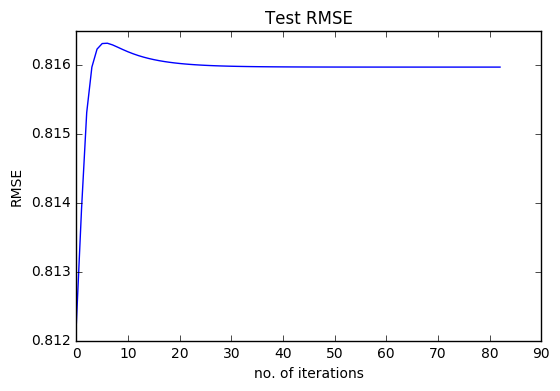

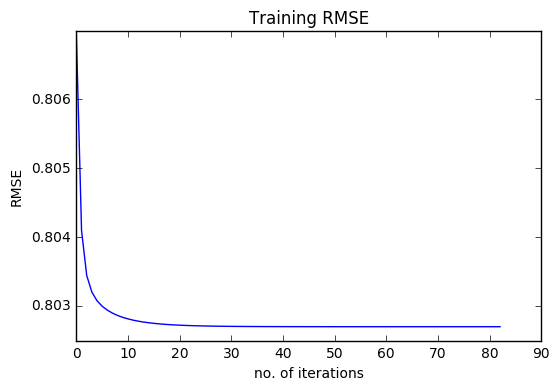

In [75]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[0],imax,epsilon,batchsize,lamb[0],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)


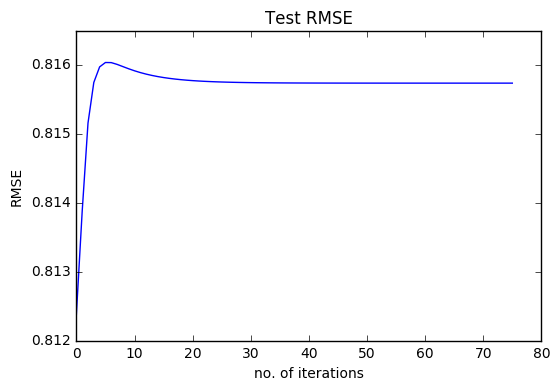

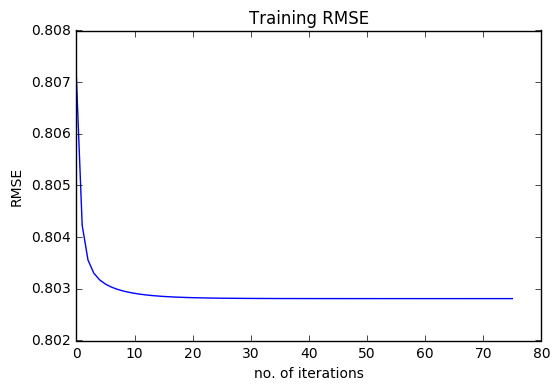

In [76]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[0],imax,epsilon,batchsize,lamb[1],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)

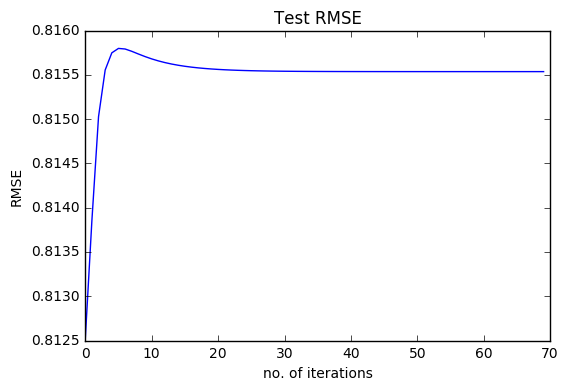

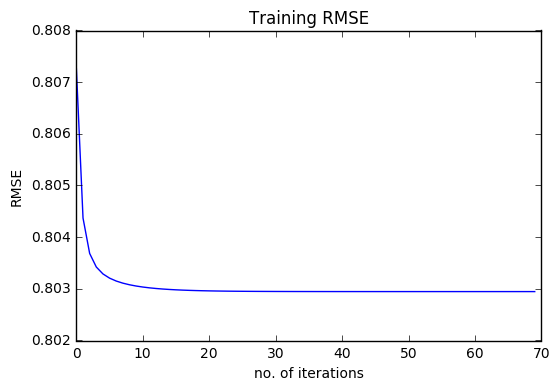

In [77]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[0],imax,epsilon,batchsize,lamb[2],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)

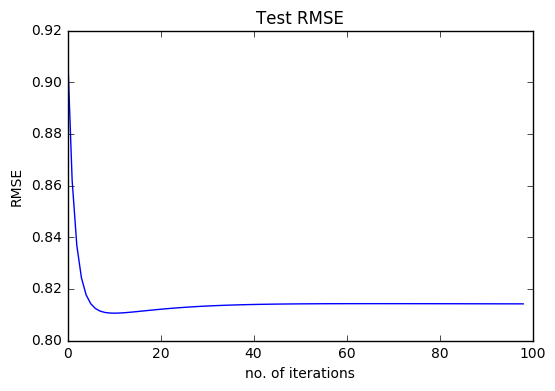

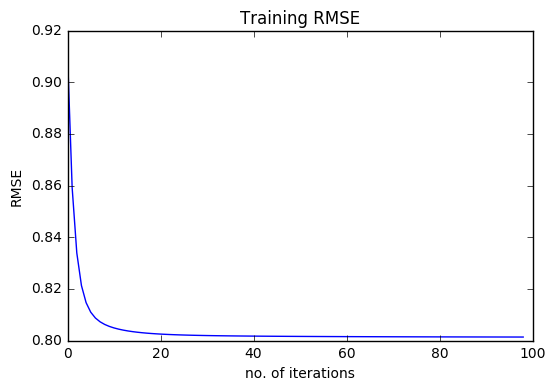

In [78]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[1],imax,epsilon,batchsize,lamb[0],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)

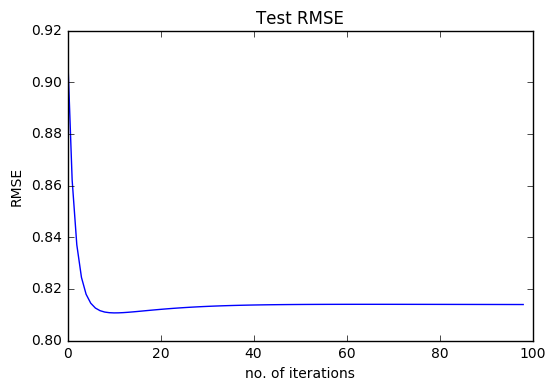

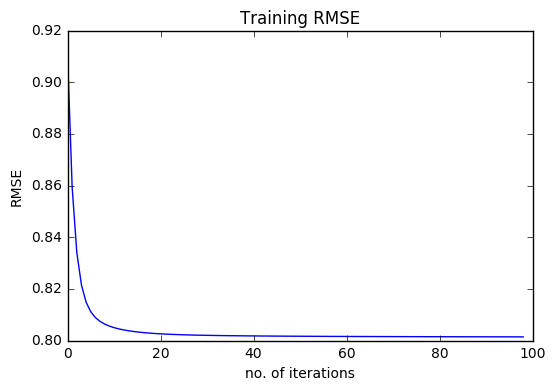

In [79]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[1],imax,epsilon,batchsize,lamb[1],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)

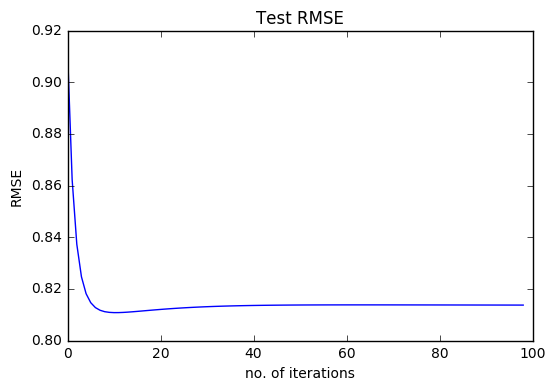

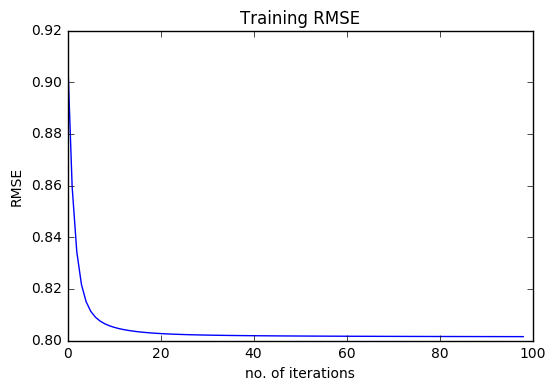

In [80]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[1],imax,epsilon,batchsize,lamb[2],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)

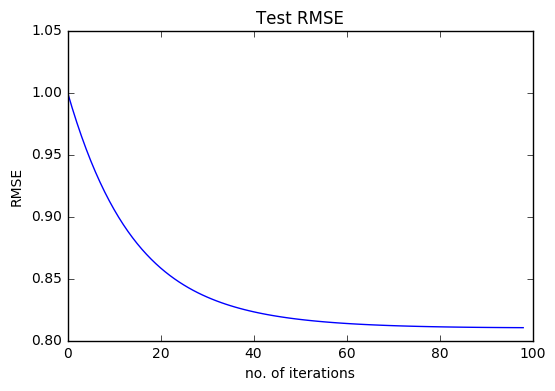

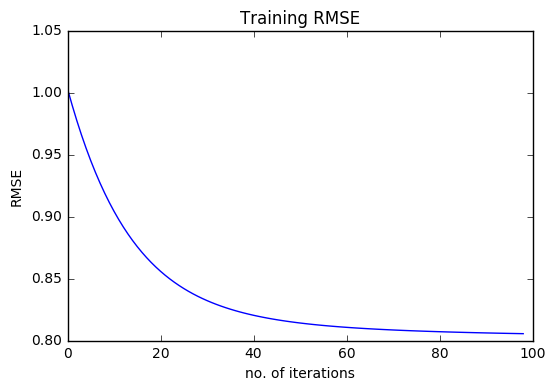

In [81]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[2],imax,epsilon,batchsize,lamb[0],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)

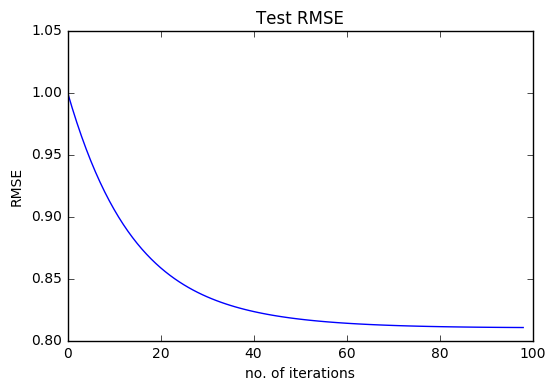

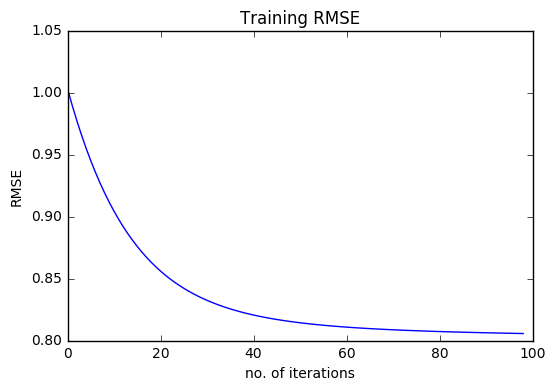

In [82]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[2],imax,epsilon,batchsize,lamb[1],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)

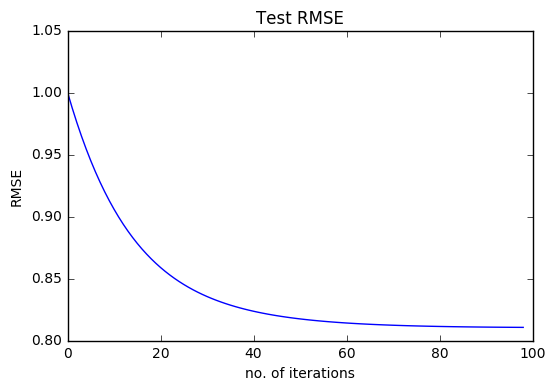

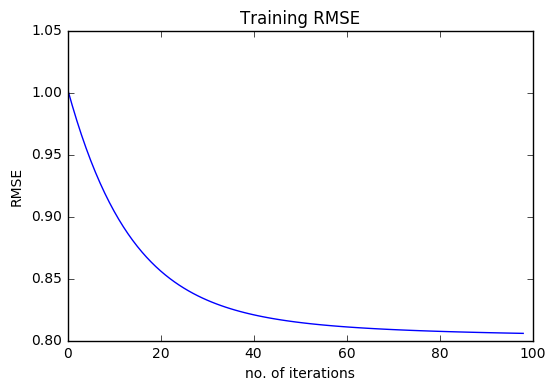

In [83]:
betaPre,rmsetrain,rmsetest,itr=mbgd(xtrain,ytrain,beta,stepsize[2],imax,epsilon,batchsize,lamb[2],xtest,ytest)
plotit(rmsetest,rmsetrain,itr)